In [1]:
push!(LOAD_PATH,"C:/JMB/DIVAnd.jl/src","."); using DIVAnd;using PyPlot
#using NCDatasets
#using DataStructures
using Statistics
using DelimitedFiles
using LinearAlgebra
using Random

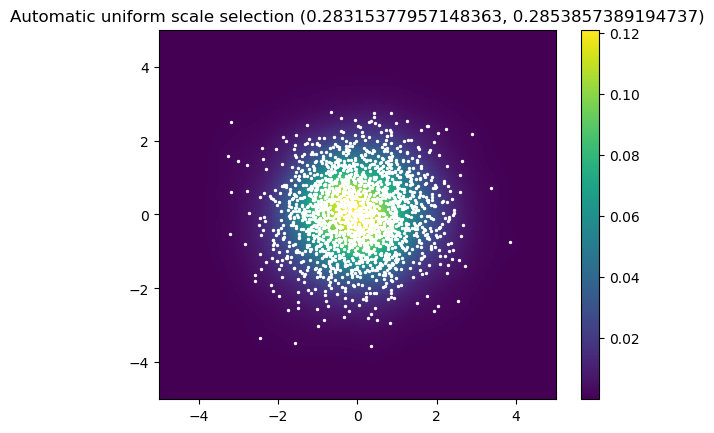

PyObject Text(0.5, 1.0, 'Automatic uniform scale selection (0.28315377957148363, 0.2853857389194737)')

In [2]:
NX=200
NY=200
# Box size
LX=10.0
LY=10.0
# Bounding box
xleft=-5.0
ybot=-5.0
xright=xleft+LX
ytop=ybot+LY
# For the synthetic case, number of points
NP=2000
Random.seed!(1234)
xo=randn(NP)
yo=randn(NP)
inflation=ones(Float64,NP)
#test for weights on poins



# Eliminate points out of the box
sel=(xo.>xleft) .& (xo.<xright) .& (yo.>ybot) .& (yo.<ytop)

xo=xo[sel]
yo=yo[sel]
inflation=inflation[sel]

NP=size(xo)[1]

dx=LX/(NX)
dy=LY/(NY)

xg = xleft+dx/2:dx:xleft+LX
yg = ybot+dy/2:dy:ybot+LY
# for pyplot
xp=xleft:dx:xleft+LX
yp = ybot:dy:ybot+LY
maskp,(pmp,pnp),(xip,yip) = DIVAnd.DIVAnd_rectdom(xp,yp)

mask,(pm,pn),(xi,yi)= DIVAnd.DIVAnd_rectdom(xg,yg)

dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

figure()
pcolor(xip,yip,dens2),colorbar()
scatter(xo,yo,s=2,c="white")
title("Automatic uniform scale selection $(LHM)")

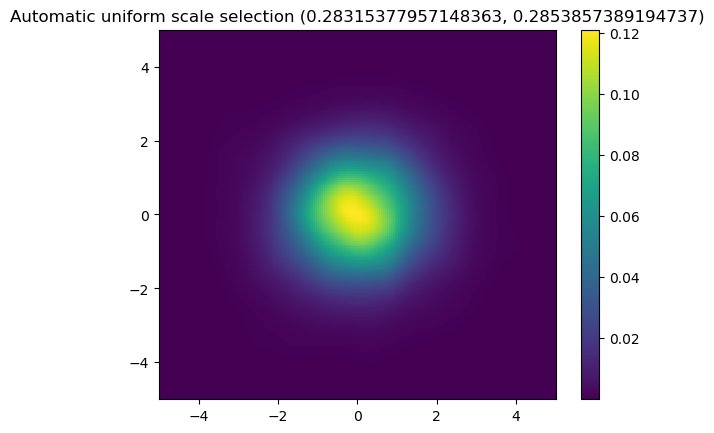

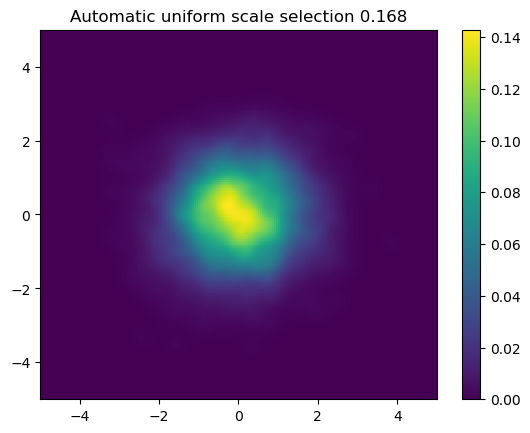

PyObject Text(0.5, 1.0, 'Automatic uniform scale selection 0.168')

In [3]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)
figure()
pcolor(xip,yip,dens2),colorbar()
title("Automatic uniform scale selection $(LHM)")

LHMIN=0.28*0.6
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,LHMIN)
figure()
pcolor(xip,yip,dens2),colorbar()
title("Automatic uniform scale selection $(LHM)")

(findmax(CV1), findmin(CV2), findmin(CVex)) = ((-2.871535521086811, 34), (-0.07741908957256494, 29), (0.6326806798449053, 30))


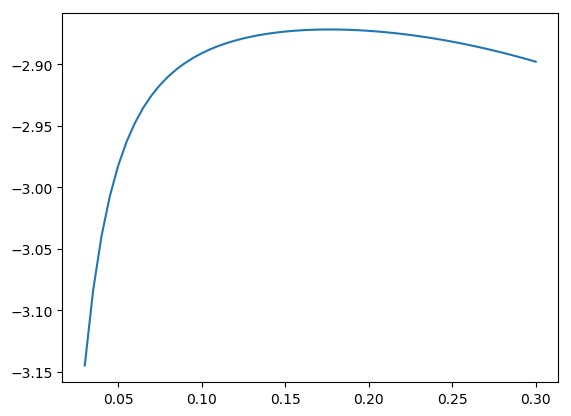

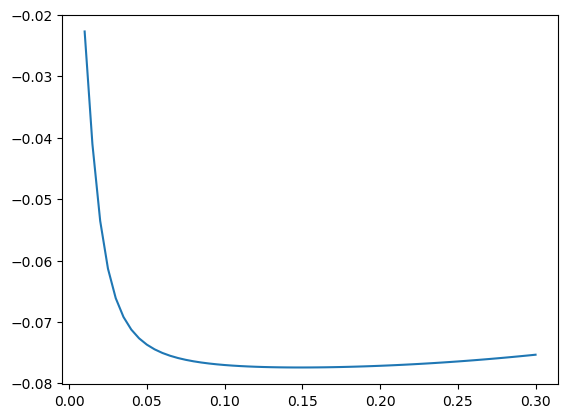

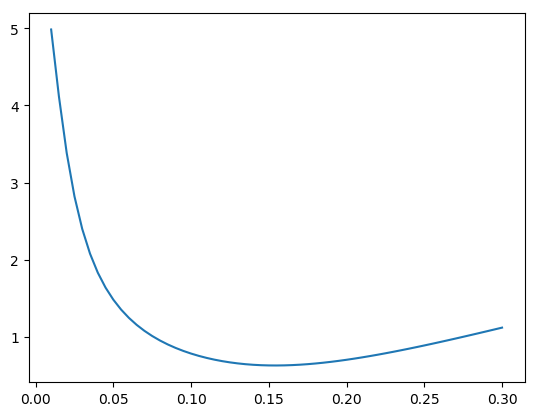

(LS[(findmax(CV1))[2]], LS[(findmin(CV2))[2]], LS[(findmin(CVex))[2]]) = (0.175, 0.15, 0.155)


(0.175, 0.15, 0.155)

In [4]:
gaussiansol=1/(2*pi)*exp.(-0.5*(xi.^2.0)-0.5*(yi.^2.0))

LS=collect(0.01:0.005:.3)
NSP=size(LS)[1]

CV1=zeros(Float64,NSP)
CV2=zeros(Float64,NSP)
CVex=zeros(Float64,NSP)
for i=1:NSP
    dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,LS[i])
    CV1[i]=LCV
    CV2[i]=LSCV
    CVex[i]=norm(gaussiansol-dens2)
end
@show findmax(CV1), findmin(CV2),findmin(CVex)
plot(LS,CV1)
figure()
plot(LS,CV2)
figure()
plot(LS,CVex)

@show LS[findmax(CV1)[2]],LS[findmin(CV2)[2]],LS[findmin(CVex)[2]]

In [5]:
# Ok factor 0.62 seems correct. Now try with inflation?

In [6]:
0.284*0.62

0.17608

┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37
┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37
┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37
┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37
┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number 

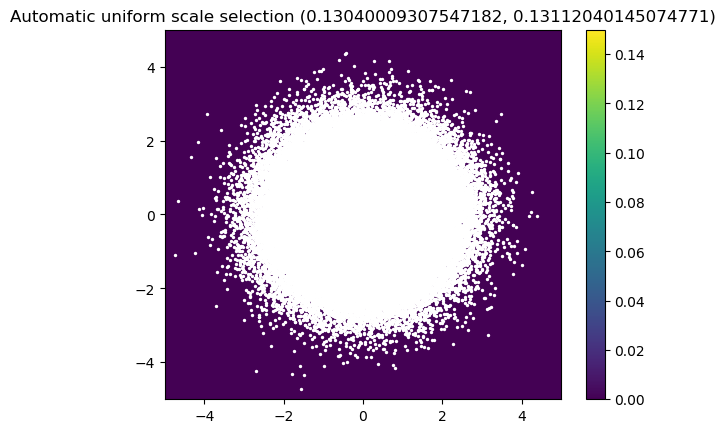

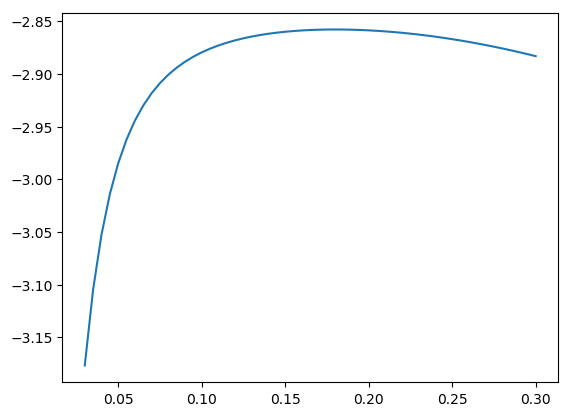

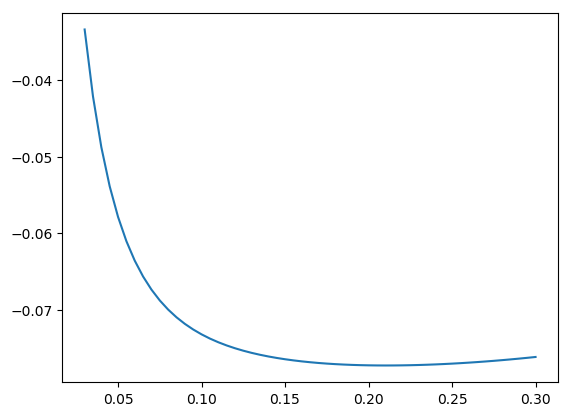

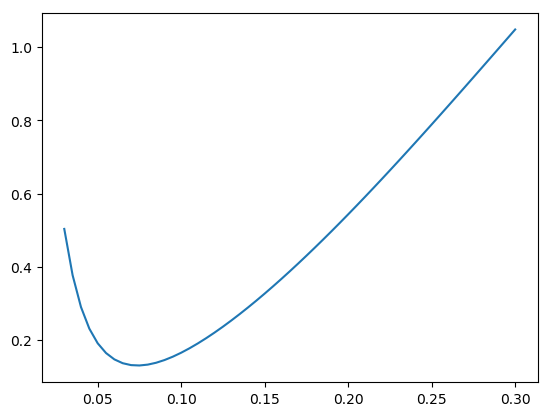

(findmax(CV1), findmin(CV2), findmin(CVex)) = ((-2.8578867411934596, 31), (-0.07727648886229584, 37), (0.13079047609646785, 10))
(LS[(findmax(CV1))[2]], LS[(findmin(CV2))[2]], LS[(findmin(CVex))[2]]) = (0.18, 0.21, 0.075)


(0.18, 0.21, 0.075)

In [7]:
NX=200
NY=200
# Box size
LX=10.0
LY=10.0
# Bounding box
xleft=-5.0
ybot=-5.0
xright=xleft+LX
ytop=ybot+LY
# For the synthetic case, number of points
NP=200000
nmax=15000
Random.seed!(1234)
xo=randn(NP)
yo=randn(NP)
inflation=ones(Float64,NP)
#test for weights on poins



# Eliminate points out of the box
sel=(xo.>xleft) .& (xo.<xright) .& (yo.>ybot) .& (yo.<ytop)

xo=xo[sel]
yo=yo[sel]
inflation=inflation[sel]

NP=size(xo)[1]

dx=LX/(NX)
dy=LY/(NY)

xg = xleft+dx/2:dx:xleft+LX
yg = ybot+dy/2:dy:ybot+LY
# for pyplot
xp=xleft:dx:xleft+LX
yp = ybot:dy:ybot+LY
maskp,(pmp,pnp),(xip,yip) = DIVAnd.DIVAnd_rectdom(xp,yp)

mask,(pm,pn),(xi,yi)= DIVAnd.DIVAnd_rectdom(xg,yg)

dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0;nmax=nmax)

figure()
pcolor(xip,yip,dens2),colorbar()
scatter(xo,yo,s=2,c="white")
title("Automatic uniform scale selection $(LHM)")


gaussiansol=1/(2*pi)*exp.(-0.5*(xi.^2.0)-0.5*(yi.^2.0))

LS=collect(0.03:0.005:.3)
NSP=size(LS)[1]

CV1=zeros(Float64,NSP)
CV2=zeros(Float64,NSP)
CVex=zeros(Float64,NSP)
for i=1:NSP
    dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,LS[i];nmax=nmax)
    CV1[i]=LCV
    CV2[i]=LSCV
    CVex[i]=norm(gaussiansol-dens2)
end
@show findmax(CV1), findmin(CV2),findmin(CVex)
figure()
plot(LS,CV1)
figure()
plot(LS,CV2)
figure()
plot(LS,CVex)

@show LS[findmax(CV1)[2]],LS[findmin(CV2)[2]],LS[findmin(CVex)[2]]

In [8]:
0.13*0.62

0.0806

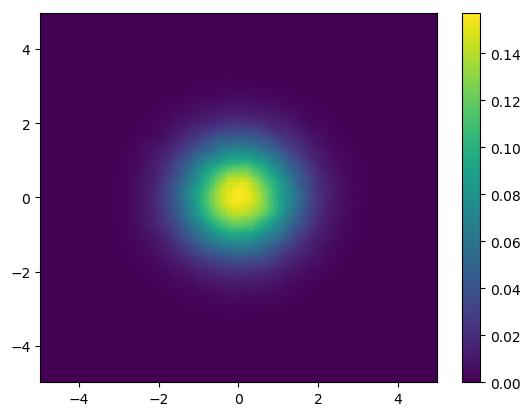

┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37


(PyObject <matplotlib.collections.PolyCollection object at 0x000000003CA0E8D0>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000000232CF28>)

In [9]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,LS[findmin(CVex)[2]];nmax=nmax)
pcolor(xi,yi,dens2),colorbar()

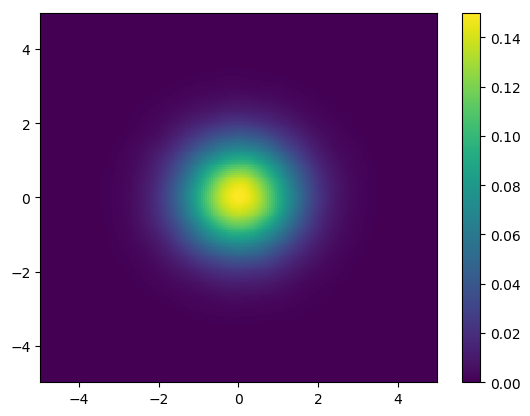

┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37


(PyObject <matplotlib.collections.PolyCollection object at 0x00000000295222B0>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000043F78C88>)

In [10]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0.13;nmax=nmax)
pcolor(xi,yi,dens2),colorbar()

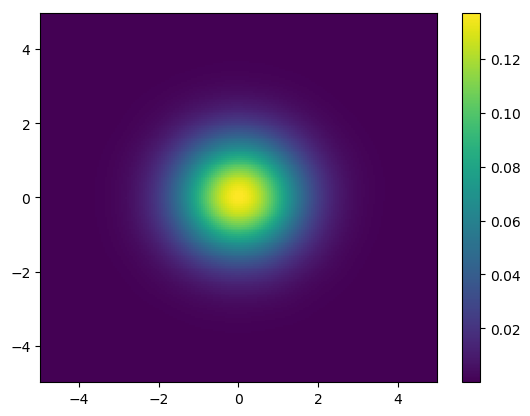

┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37


(PyObject <matplotlib.collections.PolyCollection object at 0x000000004410BEF0>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000004D2E3908>)

In [11]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,LS[findmin(CV2)[2]];nmax=nmax)
pcolor(xi,yi,dens2),colorbar()

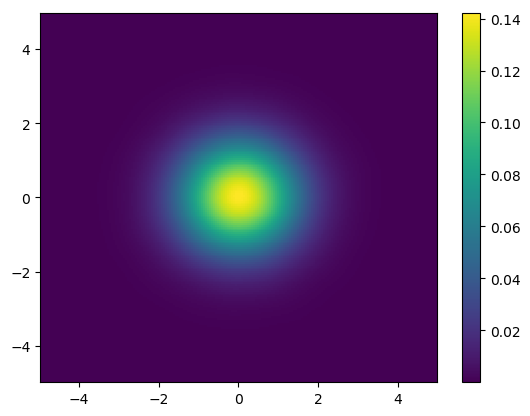

┌ Warning: Data array size (200000,) is larger then maximum 15000. Superobservations will be created. To avoid, increase nmax to the desired number of superobs
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:37


(PyObject <matplotlib.collections.PolyCollection object at 0x000000002B4AC588>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000004CE61E10>)

In [12]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,LS[findmax(CV1)[2]];nmax=nmax)
pcolor(xi,yi,dens2),colorbar()